# Hierarchical Clustering

## Importing the Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Importing the Dataset

- The first column (customer ID) is excluded as it doesn't provide any relevant data
- All the other column would be used
  
> Column 3 and 4 are the only ones so that a 2D graph can be plotted at the end, in the real world it should have been from the second column (index 1)

In [8]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the Dendrogram to Find the Optimal Number of Clusters

### Dendrogram

- A tree-like diagram showing the arrangement of clusters.
- Displays how clusters are merged or split.

### Why Dendrogram is Needed

- Visual representation of the clustering process.
- Helps to understand the structure of data.

### How Dendrogram is Used to Find Optimal Number of Clusters

1. **Plot Dendrogram**: Create a dendrogram from the hierarchical clustering process.
2. **Identify Clusters**: Look for the longest vertical distance (height) that does not cross any horizontal line.
3. **Cut-off Point**: Choose a cut-off point at this height to decide the number of clusters.
4. **Result**: The number of clusters is the number of vertical lines intersected by the cut-off.

This process helps to determine the natural divisions in the data based on the hierarchical structure.

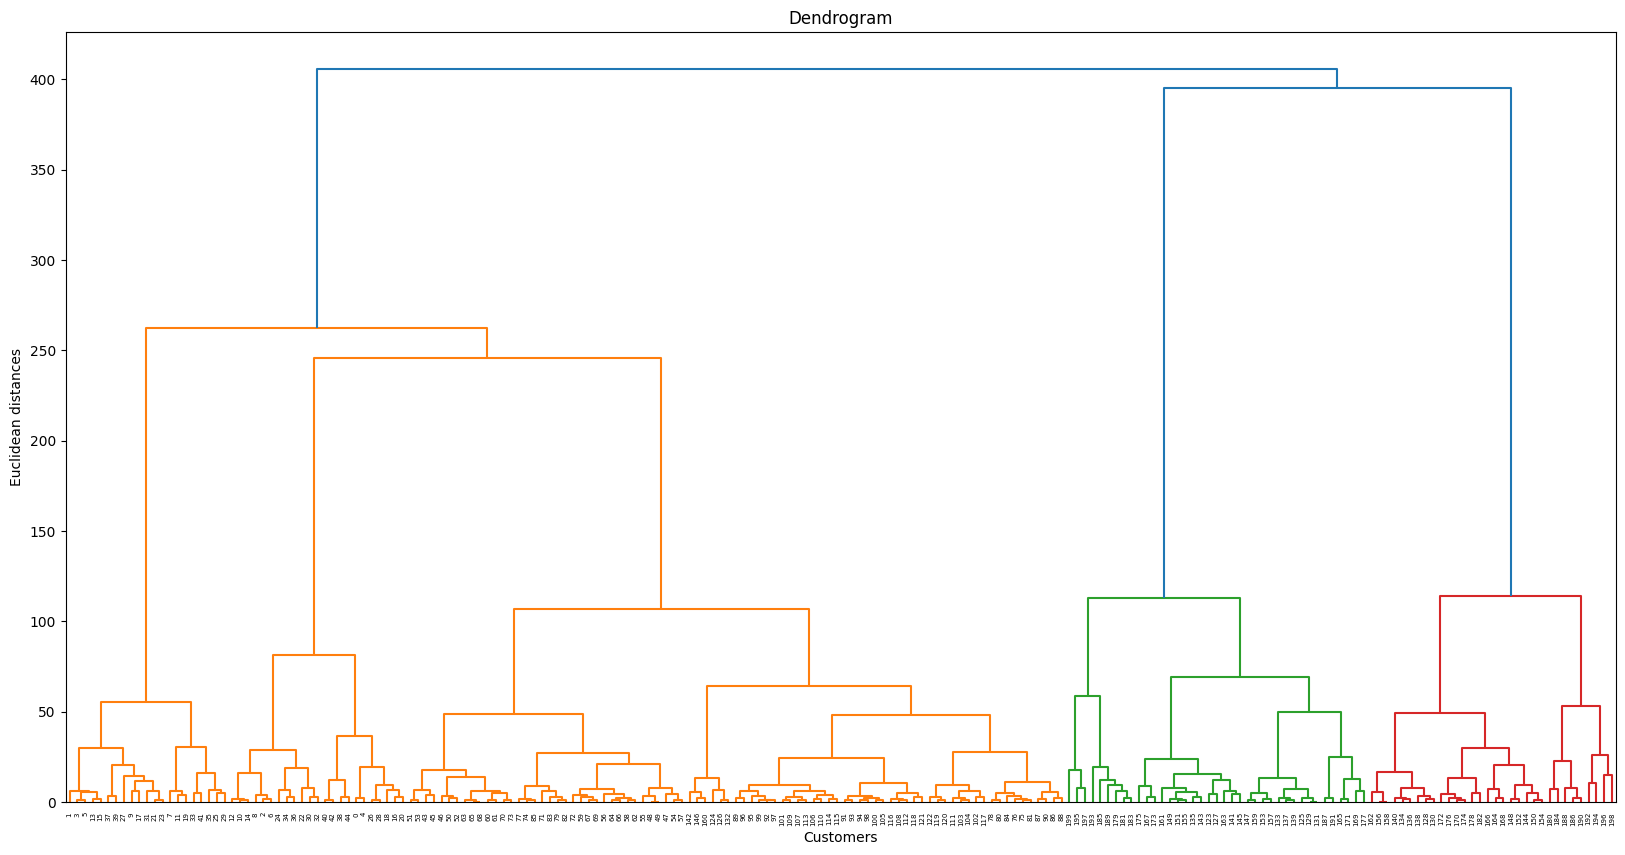

In [9]:
plt.figure(figsize=(20, 10)) 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering Model on the Dataset

### What is Hierarchical Clustering?

- Hierarchical Clustering is a clustering algorithm.
- It creates a hierarchy of clusters.
- Can be either agglomerative (bottom-up) or divisive (top-down).

### How the Basic Algorithm Works

1. **Initialization**: Start with each data point as a separate cluster.
2. **Similarity**: Calculate the distance between all pairs of clusters.
3. **Merge**: Combine the two closest clusters into one.
4. **Repeat**: Recalculate distances and merge clusters until all points are in a single cluster.

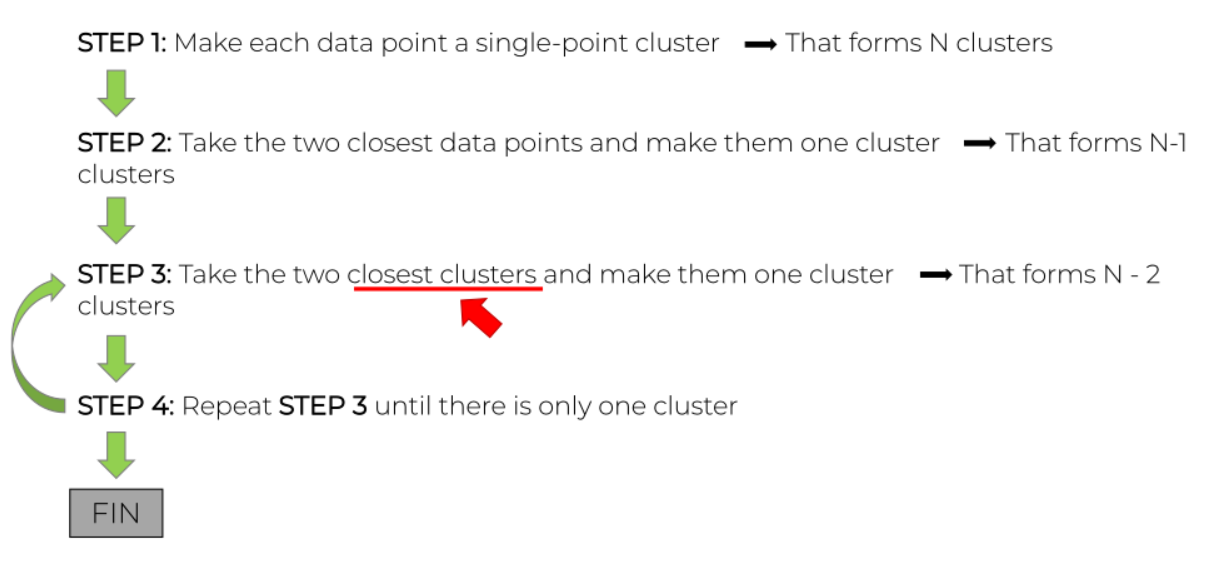

In [11]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

In [12]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualising the Clusters

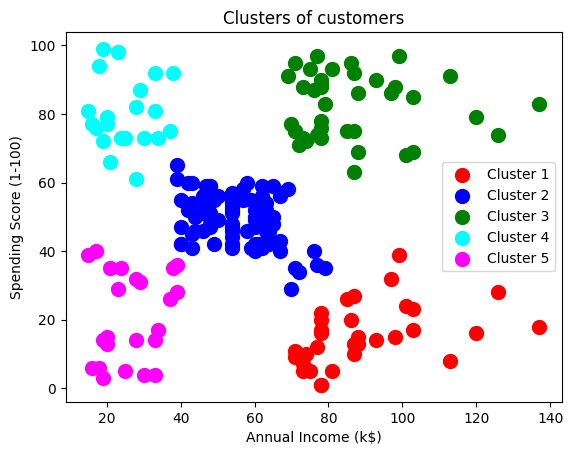

In [13]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()